In [202]:
Purpose codes:
    0-car(new)
    1-car(old)
    2 : furniture/equipment 
    3 : radio/television 
    4 : domestic appliances 
    5 : repairs 
    6 : education 
    7 : (vacation - does not exist?) 
    8 : retraining 
    9 : business 
    10 : others
Payment status of previous credit:
    0 : no credits taken/ all credits paid back duly 
    1 : all credits at this bank paid back duly 
    2 : existing credits paid back duly till now 
    3 : delay in paying off in the past 
    4 : critical account/ other credits existing (not at this bank) 
Sex and marital status:
    1 : male : divorced/separated 
    2 : female : divorced/separated/married 
    3 : male : single 
    4 : male : married/widowed 
    5 : female : single 
Guarantors:
    1 : none 
    2 : co-applicant 
    3 : guarantor 
Type of Apartment:
    1: rent
    2: own
    3: for free
Occupation:
    1 : unemployed/ unskilled - non-resident 
    2 : unskilled - resident 
    3 : skilled employee / official 
    4 : management/ self-employed/highly qualified employee/ officer 
Most valuable available asset:
    1 : real estate 
    2 : if not A121 : building society savings agreement/ life insurance 
    3 : if not A121/A122 : car or other, not in attribute 6 
    4 : unknown / no property 

SyntaxError: invalid syntax (<ipython-input-202-112e7da41e87>, line 1)

# 1. Import libraries and read the dataset.

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [354]:
credits=pd.read_csv('german_credit.csv')

# 2.Exploratory Data Analysis

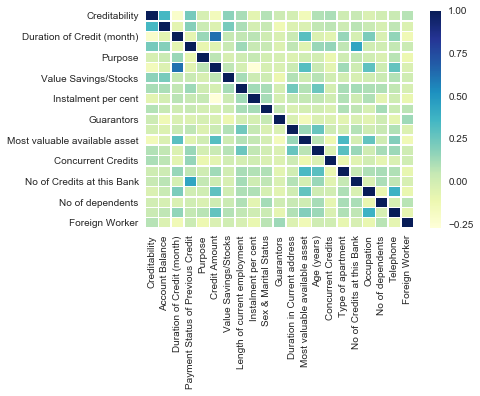

In [355]:
ax = sns.heatmap(cor,cmap="YlGnBu",linewidths=.5)

In [356]:
cor=credits.corr()
cor.nlargest(20,['Creditability'])['Creditability']

Creditability                        1.000000
Account Balance                      0.350847
Payment Status of Previous Credit    0.228785
Value Savings/Stocks                 0.178943
Length of current employment         0.116002
Concurrent Credits                   0.109844
Age (years)                          0.091272
Sex & Marital Status                 0.088184
Foreign Worker                       0.082079
No of Credits at this Bank           0.045732
Telephone                            0.036466
Guarantors                           0.025137
Type of apartment                    0.018119
No of dependents                     0.003015
Duration in Current address         -0.002967
Purpose                             -0.017979
Occupation                          -0.032735
Instalment per cent                 -0.072404
Most valuable available asset       -0.142612
Credit Amount                       -0.154740
Name: Creditability, dtype: float64

In [357]:
credits.head()
del credits['Duration in Current address']
del credits['Purpose']
del credits['Type of apartment']
del credits['No of dependents']
credits.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Most valuable available asset,Age (years),Concurrent Credits,No of Credits at this Bank,Occupation,Telephone,Foreign Worker
0,1,1,18,4,1049,1,2,4,2,1,2,21,3,1,3,1,1
1,1,1,9,4,2799,1,3,2,3,1,1,36,3,2,3,1,1
2,1,2,12,2,841,2,4,2,2,1,1,23,3,1,2,1,1
3,1,1,12,4,2122,1,3,3,3,1,1,39,3,2,2,1,2
4,1,1,12,4,2171,1,3,4,3,1,2,38,1,2,2,1,2


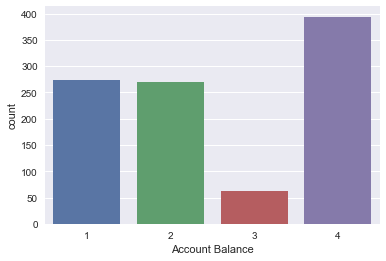

In [358]:
ay=sns.countplot(x="Account Balance",data=credits)

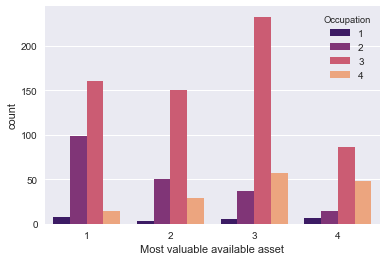

In [359]:
sns.countplot(x='Most valuable available asset',data=credits,hue='Occupation',palette='magma')

# 3. Splitting the data to train the model

In [360]:
y=credits['Creditability']
y.head()
x=credits[['Account Balance','Instalment per cent','Payment Status of Previous Credit','Value Savings/Stocks','Length of current employment','Concurrent Credits','Age (years)','Duration of Credit (month)','Credit Amount','Most valuable available asset','Guarantors']]
x.head()

,Account Balance,Instalment per cent,Payment Status of Previous Credit,Value Savings/Stocks,Length of current employment,Concurrent Credits,Age (years),Duration of Credit (month),Credit Amount,Most valuable available asset,Guarantors
0,1,4,4,1,2,3,21,18,1049,2,1
1,1,2,4,1,3,3,36,9,2799,1,1
2,2,2,2,2,4,3,23,12,841,1,1
3,1,3,4,1,3,3,39,12,2122,1,1
4,1,4,4,1,3,1,38,12,2171,2,1


In [361]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [362]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [363]:
model.score(x,y)

0.762

In [364]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.6)


In [365]:
model.score(x_te,y_te)

0.775

In [366]:
model.score(x_t,y_t)

0.7425

In [367]:
predictions=model.predict(x_te)
predictions

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

# 4.Performance Metrics

In [368]:
from sklearn.metrics import classification_report,confusion_matrix

In [369]:
print(classification_report(y_te,predictions))

             precision    recall  f1-score   support

          0       0.66      0.47      0.55       174
          1       0.81      0.90      0.85       426

avg / total       0.76      0.78      0.76       600



In [370]:
print(confusion_matrix(y_te,predictions))

[[ 81  93]
 [ 42 384]]
